In [5]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sn
plot_params = {'color': '0.75',
                'style': '.-',
                'markeredgecolor': '0.25',
                'markerfacecolor': '0.25',
                'legend': False}
sn.set_style("dark")
import warnings
warnings.filterwarnings("ignore")

In [9]:
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())
def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()
def mae(y, y_pred):
    return ((y - y_pred).abs()).mean()
def mape(y, y_pred):
    return ((y - y_pred).abs() / y).mean() * 100
def evaluate(y, y_pred):
    print("MAE:", mae(y, y_pred))
    #print("MSE:", mse(y, y_pred))
    print("RMSE:", rmse(y, y_pred))
    print("MAPE:", mape(y, y_pred))

# Moving Average (MA)

Moving Average is a commonly used statistical method for forecasting time series data. It involves calculating the average of a specific number of past observations, and then using this average to make predictions about future values.

To use the Moving Average method, you need to first select a window size, which is the number of past observations that you want to include in the calculation. For example, if you select a window size of 3, then you would calculate the average of the most recent 3 observations, and use that average to make a prediction about the next observation.

Here are the basic steps for using the Moving Average method:

Choose a window size (e.g. 3, 5, 10)

* Calculate the average of the most recent observations within that window size
* Use the calculated average to make a forecast for the next period
* Repeat steps 2 and 3 for each subsequent perio

The Moving Average method can be useful for smoothing out the fluctuations in a time series and identifying trends over time. However, it is important to note that this method assumes that the underlying pattern in the data is relatively stable over time. If the pattern changes significantly, then the Moving Average may not be an accurate forecasting method

MAE: 36.14420803782506
RMSE: 48.3697588348335
MAPE: 12.250293284704236


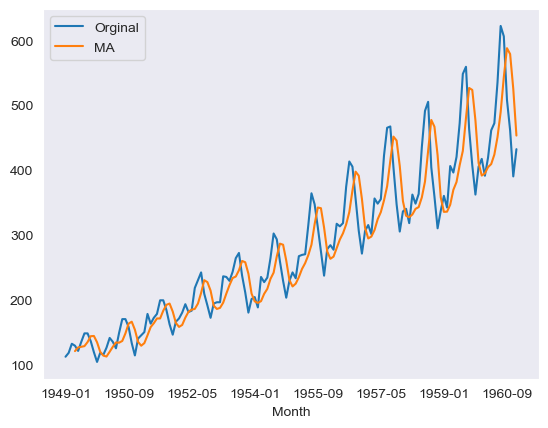

In [47]:
df = pd.read_csv('AirPassengers.csv')
# Set the index of the DataFrame to the date column
df.set_index('Month', inplace=True)
# Set the window size for the Moving Average
window_size = 3 # if window_size = 1 then work as navie

# Initialize forecast column with NaN values
df['moving_avg_forecast'] = pd.Series([None] * len(df))

# Calculate moving average and update forecast column
for i in range(window_size, len(df)):
    df['moving_avg_forecast'].iloc[i] = df['#Passengers'].iloc[:i].rolling(window_size).mean()[-1]

# Plot visulization
df['#Passengers'].plot()
df['moving_avg_forecast'].plot()
plt.legend(['Orginal', 'MA'])

# print evaltion 
evaluate(df['#Passengers'], df['moving_avg_forecast'])

code with another simple way

In [46]:
df = pd.read_csv('AirPassengers.csv')
# Set the index of the DataFrame to the date column
df.set_index('Month', inplace=True)
# Set the window size for the Moving Average
window_size = 3 # if window_size = 1 then work as navie

# Calculate the Moving Average using the rolling() function
df['moving_avg_forecast']  = df['#Passengers'].rolling(window_size).mean().shift(1)

# print evaltion 
evaluate(df['#Passengers'], df['moving_avg_forecast'])

MAE: 36.14420803782506
RMSE: 48.3697588348335
MAPE: 12.250293284704236


The weakness of Moving Average (MA) depends on how it is calculated and the period used. If the MA is calculated using an equal weight for all past data points, it can be susceptible to large price swings in the past that may no longer be relevant to current market conditions. This can lead to a slower response to current price movements, making it less effective as a short-term indicator.

However, if the MA is calculated using a weighted average,which recent price movements are given more weight than older data points. This can make the MA more responsive to current price movements and reduce the lag time, improving its effectiveness as a short-term indicator.

Additionally we found that its strength is to capture the trends component with a window appropriate to the data (such as 12 for monthly) but it can't be used as it doesn't has the ability to capture the seasonality of and long term info from the data or any changes in the underlying data generation process that may cause level shift.